**Churn Customer Dataset**
 
 
 **Introduction and Problem Statement**
Banks are constantly trying to retain their customers, as acquiring new ones is far more costly. One major challenge is customer churn, where customers stop using a bank’s services, often without warning.

The objective of this project is to predict which customers are likely to leave the bank, using machine learning classification models. By analyzing customer attributes like credit score, location, activity, and balance, we aim to find patterns that indicate churn.

This model helps banks:

Identify at-risk customers

Take action to retain them

Improve customer satisfaction and revenue

**Dataset Understanding and Description**
Dataset: Churn Modelling Dataset (available on Kaggle)

Total Records: Approx 10,000 bank customers

Target Variable: Exited

1 → Customer left the bank

0 → Customer stayed

**Key Features**
Column Name	       Description
CustomerId	       Unique ID of customer
Surname	           Last name of customer
CreditScore	       Credit score of the customer
Geography	       Country (e.g., France, Germany, Spain)
Gender	           Male or Female
Age	               Customer’s age
Tenure	           Number of years with the bank
Balance	           Bank account balance
NumOfProducts	   Number of bank products held
HasCrCard	       Whether customer has a credit card (1/0)
IsActiveMember	   Activity level (1 = Active, 0 = Inactive)
EstimatedSalary    Estimated annual salary
Exited	           Target variable: 1 = Churned, 0 = Retained

- Categorical features like Geography and Gender are to be encoded before model training.


In [1]:
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load dataset (assuming 'Churn_Modelling.csv' uploaded in Kaggle)
df = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Drop unnecessary columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Encode 
# For Gender: Label Encoding (Male=1, Female=0)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# For Geography: One-Hot Encoding
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [5]:
# Prepare features and target
X = df.drop('Exited', axis=1)  # 'Exited' is target: 1=churn, 0=not churn
y = df['Exited']


In [6]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [8]:
# Predictions
y_pred = model.predict(X_test)

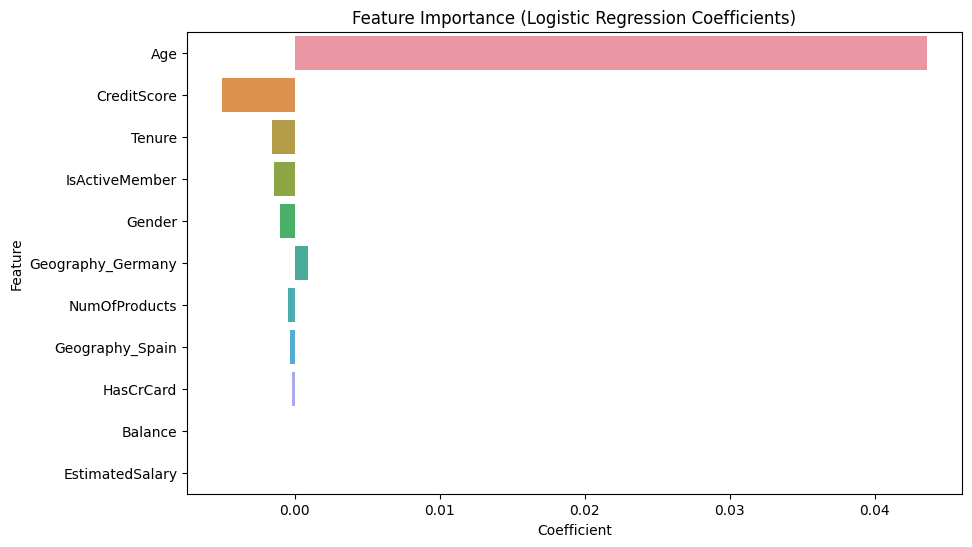

In [9]:
# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()

In [10]:
#Evaluation

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("\n=== Accuracy ===")
print("Accuracy:", (accuracy_score(y_test, y_pred)*100))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000


=== Accuracy ===
Accuracy: 80.05

=== Confusion Matrix ===
[[1573   34]
 [ 365   28]]
